<a href="https://colab.research.google.com/github/luqyz/ML/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import norm
from numpy import mean, std

# read the CSV file using pandas
df = pd.read_csv('/content/drive/MyDrive/Dataset/data.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Data Exploration

In [ ]:
df.head() #display first few rows of dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(df.columns) #display all column's names

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
print("Dataset shape:", df.shape)
print(df.info()) #summary of dataset(d.types & missing values)
print(df.describe()) #statistical summary

Dataset shape: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  p

In [ ]:
#drop misising values
df.dropna(axis=1, inplace=True)
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


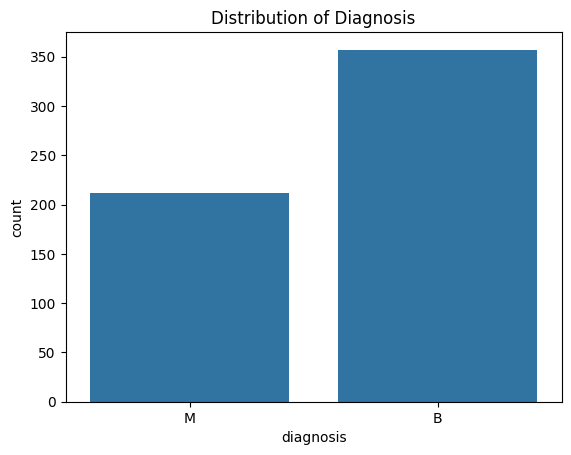

Class counts:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
sns.countplot(x='diagnosis', data=df)
class_counts = df['diagnosis'].value_counts()
plt.title('Distribution of Diagnosis')

plt.show()

print("Class counts:")
print(class_counts)

In [ ]:
# Compute correlation coefficients with the target variable
correlation_with_target = df[numerical_columns].corrwith(df['diagnosis_encoded'])

# Print correlation coefficients
print("Correlation with target variable (Numerical features):")
print(correlation_with_target)

# Sort the absolute values of correlation coefficients in descending order
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Select the top correlated features (excluding the target variable)
top_correlated_features = sorted_correlation.index

# Remove the target variable from the list of top correlated features
top_correlated_features = top_correlated_features.drop('diagnosis_encoded', errors='ignore')

# Print the top correlated features
print("Top correlated features:")
print(top_correlated_features)


Correlation with target variable (Numerical features):
id                         0.039769
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactne

In [ ]:
# Sort correlation coefficients in descending order
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Select top 4 features (excluding the target variable itself)
top_features = sorted_correlation[1:5]  # Exclude the target variable

# Print the top 4 features
print("Top 4 features with stronger relationships with the target variable:")
print(top_features)


Top 4 features with stronger relationships with the target variable:
perimeter_worst        0.782914
concave points_mean    0.776614
radius_worst           0.776454
perimeter_mean         0.742636
dtype: float64


In [ ]:
# Find the range of perimeter_worst values
perimeter_worst_range = (df['perimeter_worst'].min(), df['perimeter_worst'].max())
print("Range of perimeter_worst values:", perimeter_worst_range)


Range of perimeter_worst values: (50.41, 251.2)


In [ ]:
# Find the range of concave points_mean values
concave_points_mean_range = (df['concave points_mean'].min(), df['concave points_mean'].max())
print("Range of concave points_mean values:", concave_points_mean_range)


Range of concave points_mean values: (0.0, 0.2012)


In [ ]:
# Find the range of radius_worst values
radius_worst_range = (df['radius_worst'].min(), df['radius_worst'].max())
print("Range of radius_worst values:", radius_worst_range)


Range of radius_worst values: (7.93, 36.04)


In [ ]:
# Find the range of perimeter_mean values
perimeter_mean_range = (df['perimeter_mean'].min(), df['perimeter_mean'].max())
print("Range of perimeter_mean values:", perimeter_mean_range)


Range of perimeter_mean values: (43.79, 188.5)


# Data Preprocessing

In [ ]:
# Split into training and testing sets
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

# summarize
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(100, 2) (100,)
[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]]
[0 1 0 0 1]


In [ ]:
# fit a probability distribution to a univariate data sample
def fit_distribution(data):
  # estimate parameters
  mu = mean(data)
  sigma = std (data)
  print(mu, sigma)

  # fit distribution
  dist = norm(mu, sigma)
  return dist

In [ ]:
#generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

#sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)

# calculate priors
priory0 = len(Xy0) / len(X)
priory1= len(Xy1) / len(X)
print(priory0, priory1)

#create PDFS for y==0
X1y0 = fit_distribution(Xy0[:, 0])
X2y0 = fit_distribution (Xy0[:, 1])

# create PDFs for y==1
X1y1 = fit_distribution(Xy1[:, 0])
X2y1 = fit_distribution (Xy1[:, 1])

(50, 2) (50, 2)
0.5 0.5
-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521


In [ ]:
# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])

# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])

#calculate the independent conditional probability
def probability (X, prior, dist1, dist2):
  return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

#classify one example
Xsample, ysample = X[0], y[0]
py0 = probability(Xsample, priory0, distX1y0, distX2y0)
py1 = probability (Xsample, priory1, distX1y1, distX2y1)
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))
print('Truth: y=%d' % ysample)

-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521
P(y=0 | [-0.79415228  2.10495117]) = 0.348
P(y=1 | [-0.79415228  2.10495117]) = 0.000
Truth: y=0


//if using GaussianNB

In [ ]:
# define the model
model = GaussianNB()

#fit the model
model.fit(X, y)


#select a single sample
Xsample, ysample = [X[0]], y[0]

#make a probabilistic prediction
yhat_prob = model.predict_proba(Xsample)
print('Predicted Probabilities: ', yhat_prob)

# make a classification prediction
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('Truth: y=%d' % ysample)

Predicted Probabilities:  [[1.00000000e+00 5.52387327e-30]]
Predicted Class:  [0]
Truth: y=0


model evaluation

In [ ]:
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X, y)


SVC(random_state=42)

In [ ]:
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(X, y) # training set in x, y axis

SVC(kernel='sigmoid')

In [ ]:
svm_classifier = SVC(kernel ='poly', degree = 4)
svm_classifier.fit(X, y)

SVC(degree=4, kernel='poly')

In [ ]:
svm_classifier = SVC(kernel ='linear')
svm_classifier.fit(X, y)

SVC(kernel='linear')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
						df_feat, np.ravel(df_target),
				test_size = 0.30, random_state = 101)
# train the model on train set
model = SVC()
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



# Hyperparameter Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
df_feat = pd.DataFrame(cancer['data'],
					columns = cancer['feature_names'])

df_target = pd.DataFrame(cancer['target'],
					columns =['Cancer'])

print("Feature Variables: ")
print(df_feat.info())


Feature Variables: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smooth

In [ ]:
print(df_feat.head())

Dataframe looks like : 
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst p

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
						df_feat, np.ravel(df_target),
				test_size = 0.30, random_state = 101)

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
 print(grid.best_params_)

print(grid.best_estimator_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.0001)


In [ ]:
grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

